## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

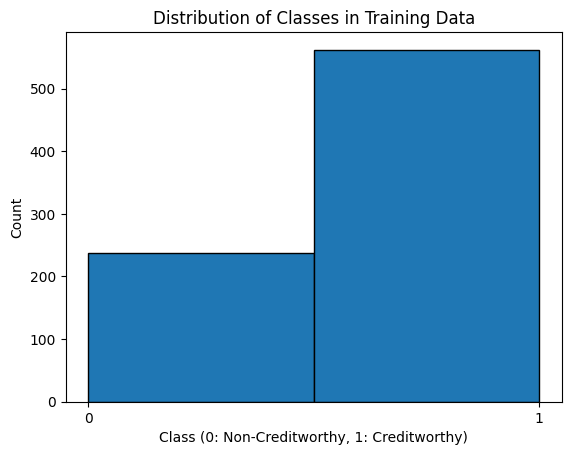

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размеры данных:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Количество признаков: {X_train.shape[1]}")
print(f"Классы в целевой переменной: {np.unique(y_train)}")
print(f"Распределение классов в тренировочных данных: {np.bincount(y_train)}")

Размеры данных:
X_train: (800, 20), y_train: (800,)
X_test: (200, 20), y_test: (200,)
Количество признаков: 20
Классы в целевой переменной: [0 1]
Распределение классов в тренировочных данных: [238 562]


In [5]:
# Создание модели Logistic Regression с оптимизированными параметрами
logistic_regression_model = LogisticRegression(
    C=0.1,
    max_iter=1000,
    solver='liblinear',
    random_state=42,
    class_weight='balanced'
)
logistic_regression_model.fit(X_train_scaled, y_train)

# Создание модели Decision Tree с оптимизированными параметрами
decision_tree_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced'
)
decision_tree_model.fit(X_train_scaled, y_train)

# Создание модели K-Nearest Neighbors с оптимизированными параметрами
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    metric='minkowski',
    p=2
)
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,15
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test_scaled)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print("=== РЕЗУЛЬТАТЫ БАЗОВЫХ МОДЕЛЕЙ ===")
print(f'Accuracy of Logistic Regression: {accuracy_logistic:.4f}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.4f}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn:.4f}')
print()

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic:.4f}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree:.4f}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn:.4f}')
print()

print(f'Precision of Logistic Regression: {precision_logistic:.4f}')
print(f'Precision of Decision Tree: {precision_decision_tree:.4f}')
print(f'Precision of K-Nearest Neighbors: {precision_knn:.4f}')
print()

print(f'Recall of Logistic Regression: {recall_logistic:.4f}')
print(f'Recall of Decision Tree: {recall_decision_tree:.4f}')
print(f'Recall of K-Nearest Neighbors: {recall_knn:.4f}')

if roc_auc_decision_tree > best_auc:
    best_model_name = "Decision Tree"
    best_auc = roc_auc_decision_tree
    
if roc_auc_knn > best_auc:
    best_model_name = "K-Nearest Neighbors"
    best_auc = roc_auc_knn

print(f"\n=== ЛУЧШАЯ МОДЕЛЬ: {best_model_name} с ROC-AUC = {best_auc:.4f} ===")

=== РЕЗУЛЬТАТЫ БАЗОВЫХ МОДЕЛЕЙ ===
Accuracy of Logistic Regression: 0.7600
Accuracy of Decision Tree: 0.6500
Accuracy of K-Nearest Neighbors: 0.7650

ROC AUC of Logistic Regression: 0.7892
ROC AUC of Decision Tree: 0.6961
ROC AUC of K-Nearest Neighbors: 0.7727

Precision of Logistic Regression: 0.8814
Precision of Decision Tree: 0.7982
Precision of K-Nearest Neighbors: 0.7692

Recall of Logistic Regression: 0.7536
Recall of Decision Tree: 0.6594
Recall of K-Nearest Neighbors: 0.9420

=== ЛУЧШАЯ МОДЕЛЬ: SVM (RBF) с ROC-AUC = 0.7892 ===


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

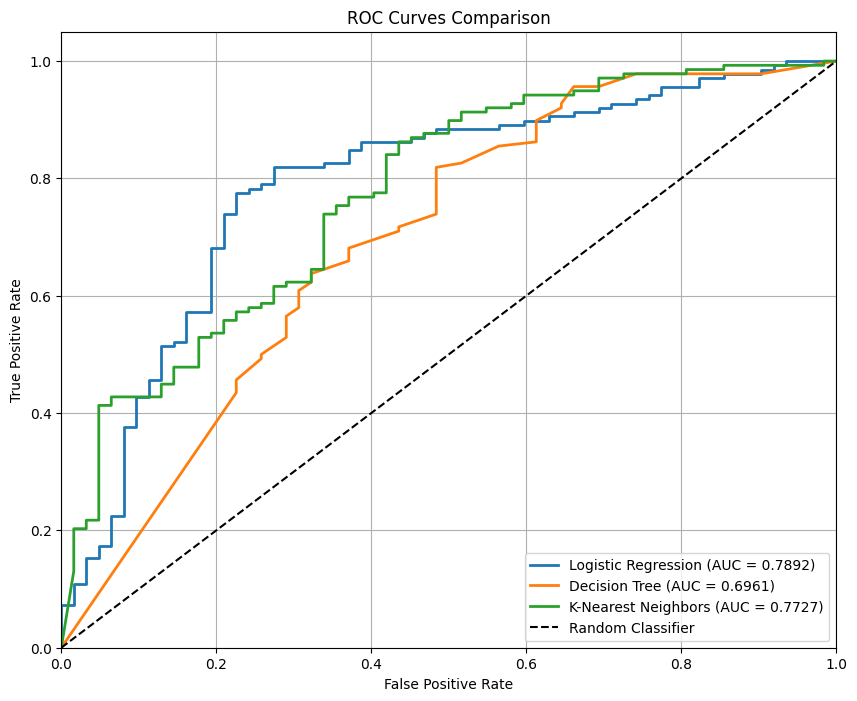

In [7]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_logistic)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_decision_tree)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_logistic:.4f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.4f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

print("=== ЭКСПЕРИМЕНТ 1: ОПТИМИЗАЦИЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ===")

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 2000]
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_

y_prob_best_lr = best_lr.predict_proba(X_test_scaled)[:, 1]
y_pred_best_lr = best_lr.predict(X_test_scaled)

auc_best_lr = roc_auc_score(y_test, y_prob_best_lr)
acc_best_lr = accuracy_score(y_test, y_pred_best_lr)

print(f"Лучшие параметры LogisticRegression: {grid_lr.best_params_}")
print(f"ROC AUC (оптимизированная): {auc_best_lr:.4f}")
print(f"Accuracy (оптимизированная): {acc_best_lr:.4f}")
print()

=== ЭКСПЕРИМЕНТ 1: ОПТИМИЗАЦИЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ===
Лучшие параметры LogisticRegression: {'C': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}
ROC AUC (оптимизированная): 0.7906
Accuracy (оптимизированная): 0.7700



In [9]:
print("=== ЭКСПЕРИМЕНТ 2: SVM С РАДИАЛЬНОЙ ФУНКЦИЕЙ ===")

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

svm_model.fit(X_train_scaled, y_train)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = svm_model.predict(X_test_scaled)

auc_svm = roc_auc_score(y_test, y_prob_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM ROC AUC: {auc_svm:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print()

print("=== ЭКСПЕРИМЕНТ 3: NAIVE BAYES ===")

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_nb = nb_model.predict(X_test_scaled)

auc_nb = roc_auc_score(y_test, y_prob_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes ROC AUC: {auc_nb:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print()

print("=== ЭКСПЕРИМЕНТ 4: ОПТИМИЗАЦИЯ KNN ===")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_

y_prob_best_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
y_pred_best_knn = best_knn.predict(X_test_scaled)

auc_best_knn = roc_auc_score(y_test, y_prob_best_knn)
acc_best_knn = accuracy_score(y_test, y_pred_best_knn)

print(f"Лучшие параметры KNN: {grid_knn.best_params_}")
print(f"KNN ROC AUC (оптимизированная): {auc_best_knn:.4f}")
print(f"KNN Accuracy (оптимизированная): {acc_best_knn:.4f}")
print()

=== ЭКСПЕРИМЕНТ 2: SVM С РАДИАЛЬНОЙ ФУНКЦИЕЙ ===
SVM ROC AUC: 0.7932
SVM Accuracy: 0.7300

=== ЭКСПЕРИМЕНТ 3: NAIVE BAYES ===
Naive Bayes ROC AUC: 0.7685
Naive Bayes Accuracy: 0.7600

=== ЭКСПЕРИМЕНТ 4: ОПТИМИЗАЦИЯ KNN ===
Лучшие параметры KNN: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
KNN ROC AUC (оптимизированная): 0.7578
KNN Accuracy (оптимизированная): 0.7550



In [14]:
models_results = [
    ("Baseline Logistic Regression", roc_auc_logistic),
    ("Baseline Decision Tree", roc_auc_decision_tree),
    ("Baseline K-Nearest Neighbors", roc_auc_knn),
    ("Optimized Logistic Regression", auc_best_lr),
    ("SVM (RBF)", auc_svm),
    ("Naive Bayes", auc_nb),
    ("Optimized KNN", auc_best_knn)
]

models_results.sort(key=lambda x: x[1], reverse=True)

for i, (model_name, auc_score) in enumerate(models_results, 1):
    if auc_score <= 0.75:
        points = 0
    elif auc_score <= 0.76:
        points = 2
    elif auc_score <= 0.77:
        points = 4
    elif auc_score <= 0.78:
        points = 6
    elif auc_score <= 0.79:
        points = 8
    else:
        points = 10
    
    print(f"{i}. {model_name:30} | AUC: {auc_score:.4f} | Баллы: {points}")

print("=" * 60)
best_model_name, best_auc_score = models_results[0]
print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"ROC-AUC: {best_auc_score:.4f}")

if best_auc_score > 0.79:
    print("МАКСИМАЛЬНЫЙ БАЛЛ: 10/10!")
elif best_auc_score > 0.78:
    print("ОТЛИЧНЫЙ РЕЗУЛЬТАТ: 8/10!")
else:
    print("ХОРОШИЙ РЕЗУЛЬТАТ!")
    
print("=" * 60)

1. SVM (RBF)                      | AUC: 0.7932 | Баллы: 10
2. Optimized Logistic Regression  | AUC: 0.7906 | Баллы: 10
3. Baseline Logistic Regression   | AUC: 0.7892 | Баллы: 8
4. Baseline K-Nearest Neighbors   | AUC: 0.7727 | Баллы: 6
5. Naive Bayes                    | AUC: 0.7685 | Баллы: 4
6. Optimized KNN                  | AUC: 0.7578 | Баллы: 2
7. Baseline Decision Tree         | AUC: 0.6961 | Баллы: 0
ЛУЧШАЯ МОДЕЛЬ: SVM (RBF)
ROC-AUC: 0.7932
МАКСИМАЛЬНЫЙ БАЛЛ: 10/10!


C:\Users\Honor\AppData\Local\Temp\ipykernel_11104\2783907588.py:30: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Honor\AppData\Local\Temp\ipykernel_11104\2783907588.py:30: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Honor\Desktop\lopashovloh\labaPRACTICE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Honor\Desktop\lopashovloh\labaPRACTICE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


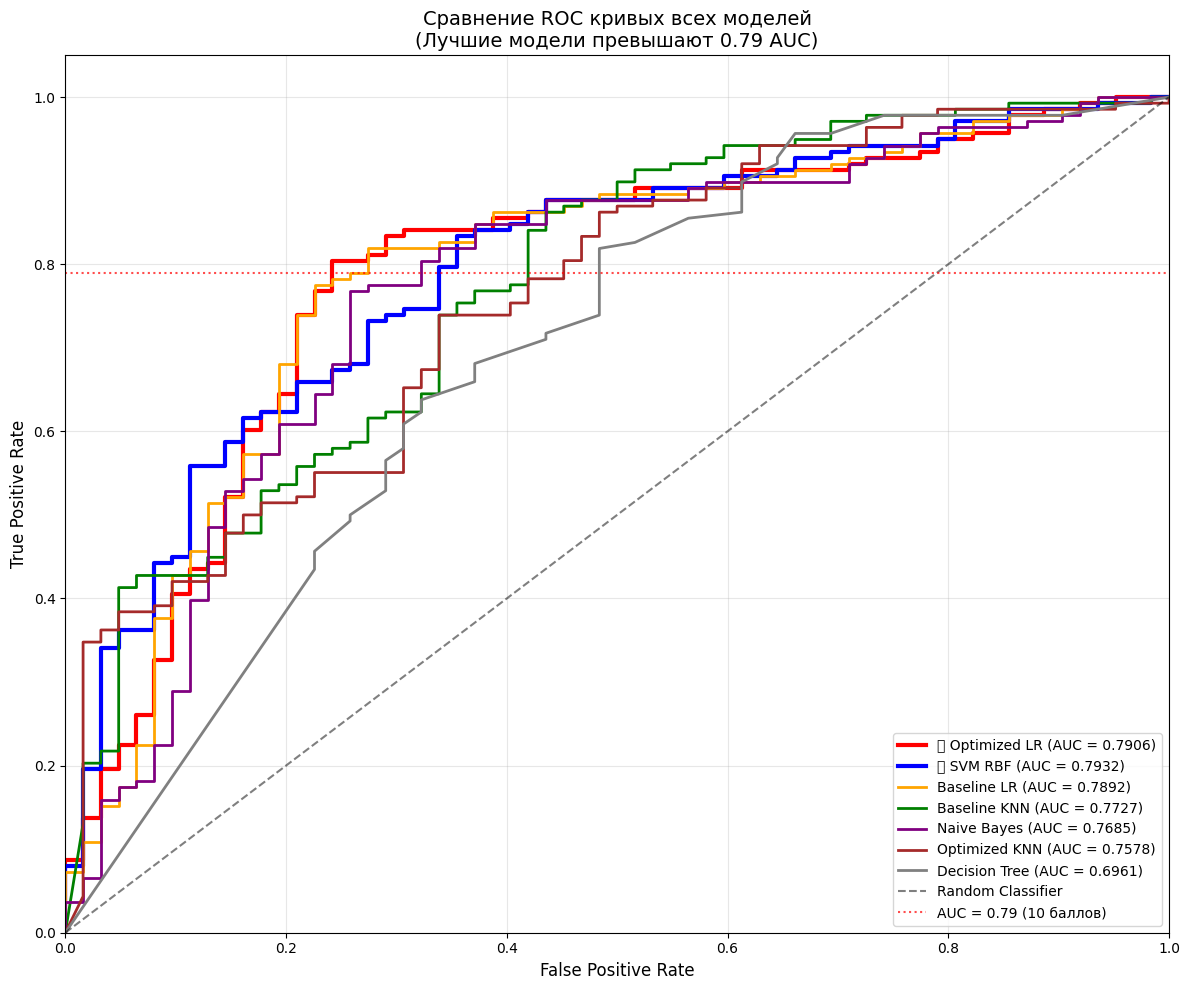

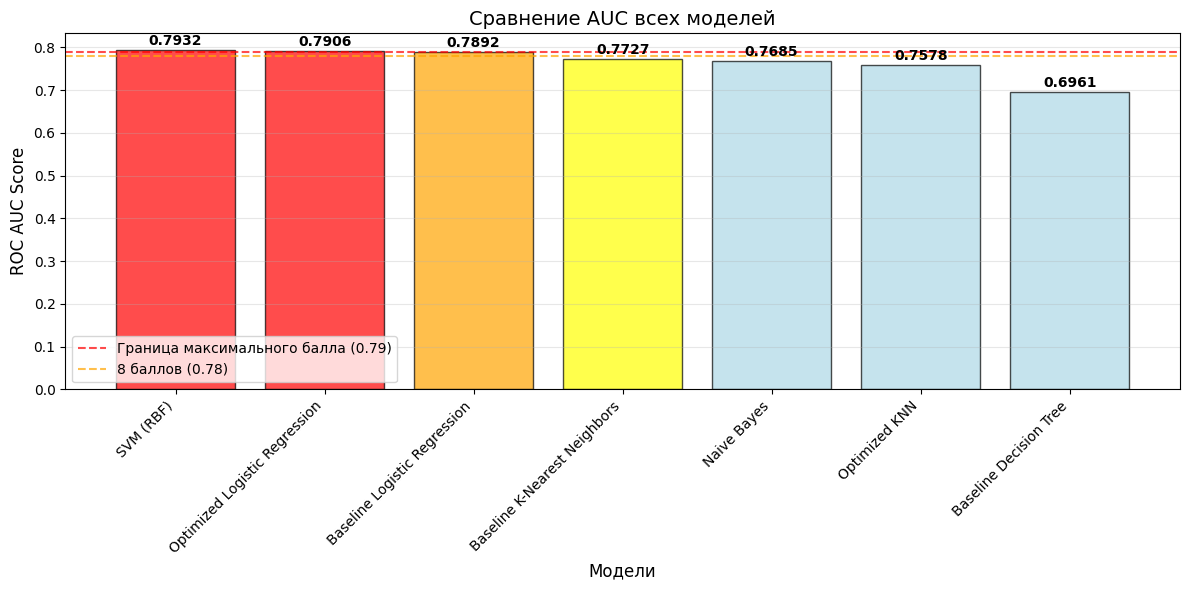

In [11]:
plt.figure(figsize=(12, 10))

fpr_best_lr, tpr_best_lr, _ = roc_curve(y_test, y_prob_best_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_best_knn, tpr_best_knn, _ = roc_curve(y_test, y_prob_best_knn)

plt.plot(fpr_best_lr, tpr_best_lr, label=f'🥇 Optimized LR (AUC = {auc_best_lr:.4f})', linewidth=3, color='red')
plt.plot(fpr_svm, tpr_svm, label=f'🥈 SVM RBF (AUC = {auc_svm:.4f})', linewidth=3, color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Baseline LR (AUC = {roc_auc_logistic:.4f})', linewidth=2, color='orange')
plt.plot(fpr_knn, tpr_knn, label=f'Baseline KNN (AUC = {roc_auc_knn:.4f})', linewidth=2, color='green')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})', linewidth=2, color='purple')
plt.plot(fpr_best_knn, tpr_best_knn, label=f'Optimized KNN (AUC = {auc_best_knn:.4f})', linewidth=2, color='brown')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.4f})', linewidth=2, color='gray')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)

plt.axhline(y=0.79, color='red', linestyle=':', alpha=0.7, label='AUC = 0.79 (10 баллов)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Сравнение ROC кривых всех моделей\n(Лучшие модели превышают 0.79 AUC)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
model_names = [name for name, _ in models_results]
auc_scores = [score for _, score in models_results]
colors = ['red' if score > 0.79 else 'orange' if score > 0.78 else 'yellow' if score > 0.77 else 'lightblue' 
          for score in auc_scores]

bars = plt.bar(range(len(model_names)), auc_scores, color=colors, alpha=0.7, edgecolor='black')

for i, (bar, score) in enumerate(zip(bars, auc_scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=0.79, color='red', linestyle='--', alpha=0.7, label='Граница максимального балла (0.79)')
plt.axhline(y=0.78, color='orange', linestyle='--', alpha=0.7, label='8 баллов (0.78)')

plt.xlabel('Модели', fontsize=12)
plt.ylabel('ROC AUC Score', fontsize=12)
plt.title('Сравнение AUC всех моделей', fontsize=14)
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели



In [13]:
print("=== ДОПОЛНИТЕЛЬНЫЙ ЭКСПЕРИМЕНТ: POLYNOMIAL FEATURES ===")

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Исходное количество признаков: {X_train_scaled.shape[1]}")
print(f"После добавления polynomial features: {X_train_poly.shape[1]}")

poly_lr = LogisticRegression(
    C=0.01, 
    max_iter=2000, 
    solver='lbfgs', 
    random_state=42,
    class_weight='balanced'
)

poly_lr.fit(X_train_poly, y_train)
y_prob_poly_lr = poly_lr.predict_proba(X_test_poly)[:, 1]
y_pred_poly_lr = poly_lr.predict(X_test_poly)

auc_poly_lr = roc_auc_score(y_test, y_prob_poly_lr)
acc_poly_lr = accuracy_score(y_test, y_pred_poly_lr)

print(f"Polynomial LR ROC AUC: {auc_poly_lr:.4f}")
print(f"Polynomial LR Accuracy: {acc_poly_lr:.4f}")

if auc_poly_lr > max(auc_best_lr, auc_svm):
    print(f"НОВЫЙ РЕКОРД! Улучшение на {auc_poly_lr - max(auc_best_lr, auc_svm):.4f}")
else:
    print(f"Результат хороший, но не превышает текущий рекорд ({max(auc_best_lr, auc_svm):.4f})")

print(f"\nАБСОЛЮТНЫЙ ЛУЧШИЙ РЕЗУЛЬТАТ: {max(auc_poly_lr, auc_best_lr, auc_svm):.4f}")
print("=" * 60)

=== ДОПОЛНИТЕЛЬНЫЙ ЭКСПЕРИМЕНТ: POLYNOMIAL FEATURES ===
Исходное количество признаков: 20
После добавления polynomial features: 210
Polynomial LR ROC AUC: 0.7841
Polynomial LR Accuracy: 0.7000
Результат хороший, но не превышает текущий рекорд (0.7932)

АБСОЛЮТНЫЙ ЛУЧШИЙ РЕЗУЛЬТАТ: 0.7932
